# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
import requests

url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
replaceUrl = url.replace(" ", "%20")
city_weather = requests.get(replaceUrl).json()
city_weather

{'coord': {'lon': -155.09, 'lat': 19.73},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 297.74,
  'feels_like': 297.83,
  'temp_min': 295.37,
  'temp_max': 301.15,
  'pressure': 1018,
  'humidity': 65},
 'visibility': 16093,
 'wind': {'speed': 3.6, 'deg': 140},
 'clouds': {'all': 40},
 'dt': 1593976569,
 'sys': {'type': 1,
  'id': 7881,
  'country': 'US',
  'sunrise': 1593963990,
  'sunset': 1594011796},
 'timezone': -36000,
 'id': 5855927,
 'name': 'Hilo',
 'cod': 200}

In [32]:
print('Beginning Data Retrieval')
print('~~~~~~~~~~~~~~~~~~~~~~~~')

# make counters
set_count = 1
record_count = 1
city_data = []

# loop through all the cities in the cities list
for i, city in enumerate (cities):
    #grouping cities in groups of 50
    if i%50 == 0 and i >= 50:
        set_count = set_count + 1
        record_count = 0
    #print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    
    city_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}'
    
    cityweather = requests.get(city_url).json()
    if "message" in cityweather:
        if cityweather["message"]=="city not found":
            print('Skipping... City not found')
    else:
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
        record_count = record_count + 1
        citylat = cityweather['coord']['lat']
        citylong = cityweather['coord']['lon']
        maxtemp = cityweather['main']['temp_max']
        humidity = cityweather['main']['humidity']
        clouds = cityweather['clouds']['all']
        wind = cityweather['wind']['speed']
        country = cityweather['sys']['country']
        date = cityweather['dt']
        
        city_data.append({'City': city,
                         'Latitude': citylat,
                         'Longitude': citylong,
                         'Maximum Temperature': maxtemp,
                         'Humidity': humidity,
                         'Cloud Cover': clouds,
                         'Wind Speed': wind,
                         'Country': country,
                         'Date': date})
        
    #print(cityweather)
    

Beginning Data Retrieval
~~~~~~~~~~~~~~~~~~~~~~~~
Processing Record 1 of Set 1 | seymchan
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | silopi
Processing Record 7 of Set 1 | angoche
Processing Record 8 of Set 1 | la cruz
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | bambanglipuro
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | wonosari
Processing Record 13 of Set 1 | mishan
Processing Record 14 of Set 1 | san cristobal
Processing Record 15 of Set 1 | kapaa
Skipping... City not found
Processing Record 16 of Set 1 | kutum
Processing Record 17 of Set 1 | cordoba
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | tezu
Processing Record 20 of Set 1 | trairi
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | san andres
Processing Record 23 of Set

Processing Record 6 of Set 5 | tortosa
Skipping... City not found
Processing Record 7 of Set 5 | faya
Processing Record 8 of Set 5 | ankara
Processing Record 9 of Set 5 | hilo
Processing Record 10 of Set 5 | coquimbo
Processing Record 11 of Set 5 | pushkinskiye gory
Processing Record 12 of Set 5 | mar del plata
Processing Record 13 of Set 5 | snasa
Processing Record 14 of Set 5 | antofagasta
Processing Record 15 of Set 5 | ancud
Processing Record 16 of Set 5 | lamphun
Processing Record 17 of Set 5 | santa maria
Processing Record 18 of Set 5 | east london
Processing Record 19 of Set 5 | kristiansund
Processing Record 20 of Set 5 | kruisfontein
Processing Record 21 of Set 5 | pisco
Processing Record 22 of Set 5 | verkhnevilyuysk
Processing Record 23 of Set 5 | tecoanapa
Processing Record 24 of Set 5 | pitimbu
Processing Record 25 of Set 5 | severnyy
Processing Record 26 of Set 5 | cockburn town
Processing Record 27 of Set 5 | suruc
Processing Record 28 of Set 5 | semypolky
Processing Rec

Processing Record 11 of Set 9 | manokwari
Processing Record 12 of Set 9 | sur
Processing Record 13 of Set 9 | dong hoi
Processing Record 14 of Set 9 | wagar
Processing Record 15 of Set 9 | udgir
Processing Record 16 of Set 9 | constitucion
Processing Record 17 of Set 9 | akdepe
Processing Record 18 of Set 9 | diplo
Processing Record 19 of Set 9 | bairnsdale
Processing Record 20 of Set 9 | tocopilla
Processing Record 21 of Set 9 | yanam
Processing Record 22 of Set 9 | alta floresta
Processing Record 23 of Set 9 | klaksvik
Processing Record 24 of Set 9 | sao filipe
Processing Record 25 of Set 9 | arman
Processing Record 26 of Set 9 | kargasok
Processing Record 27 of Set 9 | ryabovo
Processing Record 28 of Set 9 | nouadhibou
Processing Record 29 of Set 9 | kerema
Processing Record 30 of Set 9 | banjar
Processing Record 31 of Set 9 | ostrovnoy
Processing Record 32 of Set 9 | port blair
Processing Record 33 of Set 9 | gubkinskiy
Processing Record 34 of Set 9 | comodoro rivadavia
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
cityweather_df = pd.DataFrame(city_data)

cityweather_df

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Country,Date
0,seymchan,62.88,152.43,286.04,63,98,1.68,RU,1593976689
1,busselton,-33.65,115.33,286.48,80,0,6.12,AU,1593976689
2,hobart,-42.88,147.33,282.59,87,90,2.32,AU,1593976690
3,ushuaia,-54.80,-68.30,274.15,74,75,0.93,AR,1593976455
4,punta arenas,-53.15,-70.92,274.15,88,40,3.60,CL,1593976450
...,...,...,...,...,...,...,...,...,...
560,piopio,-38.47,175.02,284.82,90,100,0.89,NZ,1593976757
561,grand-santi,4.25,-54.38,301.12,83,100,2.29,GF,1593976757
562,sheridan,44.83,-106.92,301.15,28,1,3.10,US,1593976600
563,necochea,-38.55,-58.74,282.59,80,28,0.89,AR,1593976757


In [34]:
outputpath = 'output_cities.csv'
cityweather_df.to_csv(outputpath, index_label = 'City ID')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
cityweather_df.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Date
count,565.00000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.44469,17.910779,294.040655,69.276106,53.407080,3.593540,1.593977e+09
std,33.31769,93.290586,8.264021,21.775243,39.522962,2.393589,6.929509e+01
min,-54.80000,-179.170000,267.150000,3.000000,0.000000,0.050000,1.593976e+09
25%,-6.54000,-64.180000,288.080000,56.000000,12.000000,1.840000,1.593977e+09
50%,24.47000,23.050000,295.460000,74.000000,65.000000,3.100000,1.593977e+09
75%,48.81000,102.540000,300.330000,87.000000,95.000000,5.000000,1.593977e+09
max,78.22000,179.320000,316.710000,100.000000,100.000000,16.430000,1.593977e+09


In [36]:
#  Get the indices of cities that have humidity over 100%.


In [37]:
reallyhumid = cityweather_df[(cityweather_df['Humidity'] > 100)].index
reallyhumid

Int64Index([], dtype='int64')

In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [39]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

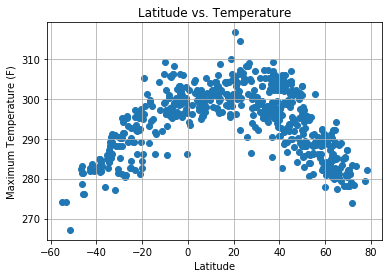

This plot shows the relationship between latitude and temperature on the globe. As expected, the temperature goes up the closer you get to the equator.


In [40]:
scatterlat = cityweather_df['Latitude']
scatterhumid = cityweather_df['Humidity']
scattertemp = cityweather_df['Maximum Temperature']
scattercloud = cityweather_df['Cloud Cover']
scatterwind = cityweather_df['Wind Speed']
#------------------------------------------
plt.scatter(scatterlat, scattertemp, marker = 'o')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.savefig('latvstemp.png')
plt.show()
print("This plot shows the relationship between latitude and temperature on the globe. As expected, the temperature goes up the closer you get to the equator.")

## Latitude vs. Humidity Plot

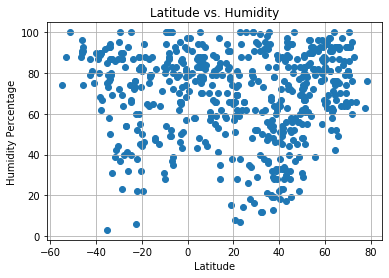

This plot shows the relationship between humidity and latitude. It seems like it gets more humid the farther you get from the equator.


In [41]:
plt.scatter(scatterlat, scatterhumid, marker = 'o')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.title("Latitude vs. Humidity")
plt.savefig('latvshum.png')
plt.show()
print('This plot shows the relationship between humidity and latitude. It seems like it gets more humid the farther you get from the equator.')

## Latitude vs. Cloudiness Plot

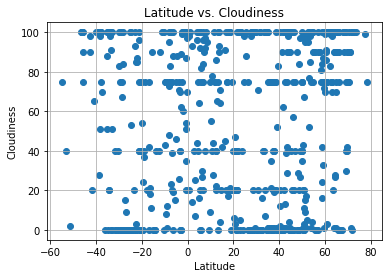

This plot shows the relationship between latitude and cloudiness. Seems like it gets cloudier toward the poles. 


In [42]:
plt.scatter(scatterlat, scattercloud, marker = 'o')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig('latvscloud.png')
plt.show()
print('This plot shows the relationship between latitude and cloudiness. Seems like it gets cloudier toward the poles. ')

## Latitude vs. Wind Speed Plot

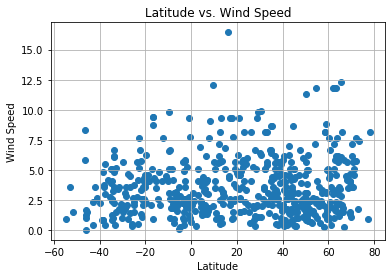

'This plot shows the relationship of latitude and wind speed. This plot reflects that it gets windier as you get closer to the equator.'

In [43]:
plt.scatter(scatterlat, scatterwind, marker = 'o')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig('latvswind.png')
plt.show()
"This plot shows the relationship of latitude and wind speed. This plot reflects that it gets windier as you get closer to the equator."

## Linear Regression

In [44]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLR(xvalues, yvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues, yvalues)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

In [45]:
# Create Northern and Southern Hemisphere DataFrames
northerndf = cityweather_df[cityweather_df['Latitude'] > 0]
southerndf = cityweather_df[cityweather_df['Latitude'] < 0]
northerndf

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Country,Date
0,seymchan,62.88,152.43,286.04,63,98,1.68,RU,1593976689
5,silopi,37.25,42.47,303.25,29,1,3.34,TR,1593976690
7,la cruz,23.92,-106.90,304.13,62,40,3.38,MX,1593976690
12,mishan,45.55,131.88,289.85,94,100,2.42,CN,1593976691
13,san cristobal,7.77,-72.22,305.15,46,40,7.70,VE,1593976691
...,...,...,...,...,...,...,...,...,...
558,sharjah,25.36,55.40,308.15,62,88,1.50,AE,1593976757
559,bangkal,6.07,121.07,298.50,84,27,1.82,PH,1593976757
561,grand-santi,4.25,-54.38,301.12,83,100,2.29,GF,1593976757
562,sheridan,44.83,-106.92,301.15,28,1,3.10,US,1593976600


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

No handles with labels found to put in legend.


slope: -0.299128    intercept: 306.681230
R-squared: 0.530728
R-squared: 0.530728


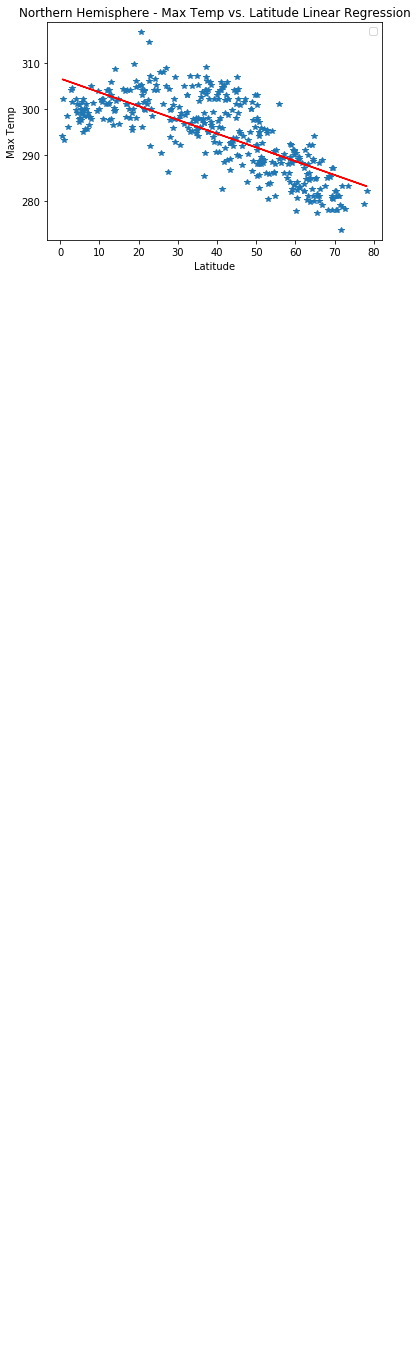

This plot shows the relationship between degrees in Kelvin and the latitude. The temperature is clearly higher toward the equator.


In [46]:
northernmaxtemp = northerndf['Maximum Temperature']
northernlat = northerndf["Latitude"]
slope, intercept, r_value, p_value, std_err = linregress(northernlat, northernmaxtemp)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(northernlat, northernmaxtemp, "*")
plt.plot(northernlat, intercept + slope*northernlat, "r")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("NtempvsLLR.png")
plt.show()
print('This plot shows the relationship between degrees in Kelvin and the latitude. The temperature is clearly higher toward the equator.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

slope: 0.486009    intercept: 302.240589
R-squared: 0.682173


No handles with labels found to put in legend.


R-squared: 0.682173


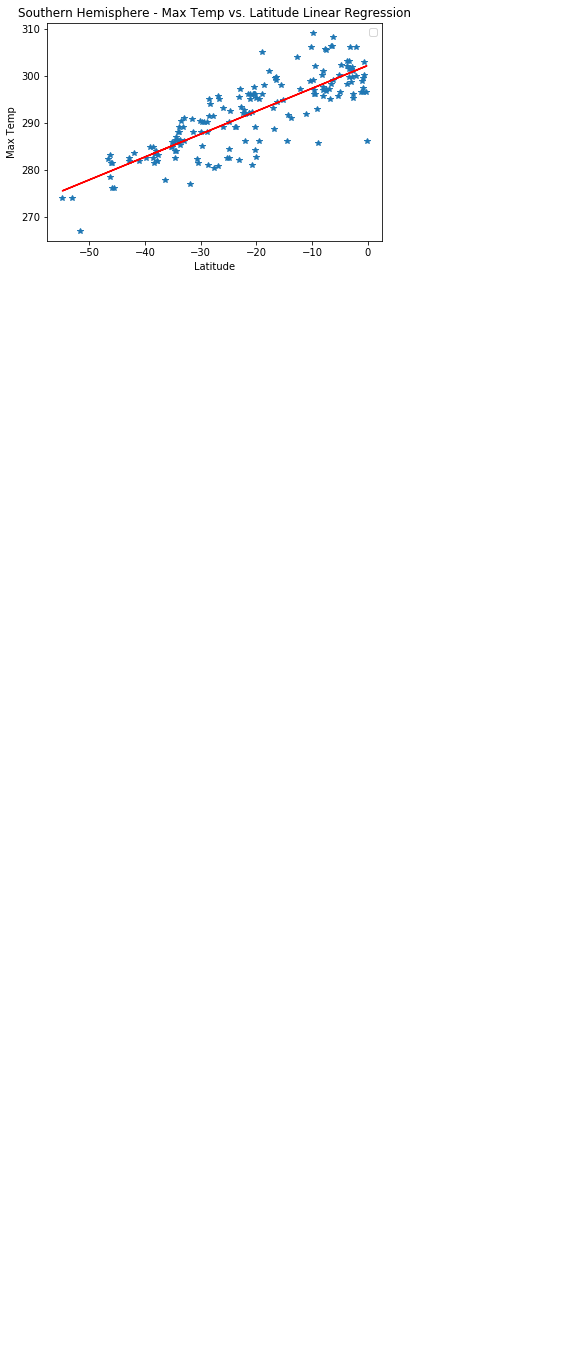

This graph reflects the temperature in Kelvin in relation to latitudes. This parallels the previous chart and shows that the temperature raises when you get closer to the equator.


In [47]:
southernmaxtemp = southerndf['Maximum Temperature']
southernlat = southerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(southernlat, southernmaxtemp)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(southernlat, southernmaxtemp, "*")
plt.plot(southernlat, intercept + slope*southernlat, "r")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("StempvsLLR.png")
plt.show()
print('This graph reflects the temperature in Kelvin in relation to latitudes. This parallels the previous chart and shows that the temperature raises when you get closer to the equator.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope: 0.092151    intercept: 32.758774
R-squared: 0.010464


No handles with labels found to put in legend.


R-squared: 0.010464


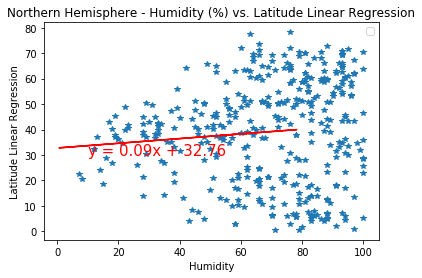

This plot shows relationship between humidity and latitude in the Northern Hemisphere. I dont think there is a clear trend.


In [48]:
northernhumidity = northerndf['Humidity']
northernlat = northerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(northernhumidity, northernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(northernhumidity, northernlat, "*")
plt.plot(northernlat, intercept + slope*northernlat, "r")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("NHumidvsLLR.png")
plt.show()
print('This plot shows relationship between humidity and latitude in the Northern Hemisphere. I dont think there is a clear trend.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope: -0.072986    intercept: -16.082018

No handles with labels found to put in legend.



R-squared: 0.012296
R-squared: 0.012296


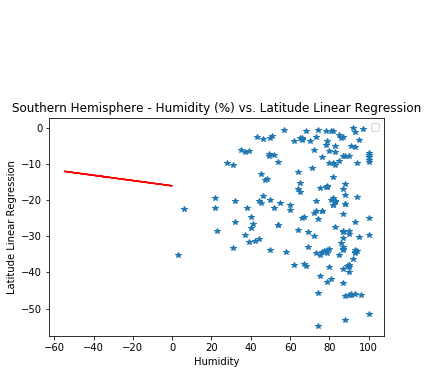

This plot shows relationship between humidity and latitude in the Southern Hemisphere. I dont think there is a clear trend.


In [49]:
southernhumidity = southerndf['Humidity']
southernlat = southerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(southernhumidity, southernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(southernhumidity, southernlat, "*")
plt.plot(southernlat, intercept + slope*southernlat, "r")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("ShumidvsLLR.png")
plt.show()
print('This plot shows relationship between humidity and latitude in the Southern Hemisphere. I dont think there is a clear trend.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope: 0.050816    intercept: 36.347896
R-squared: 0.010354


No handles with labels found to put in legend.


R-squared: 0.010354


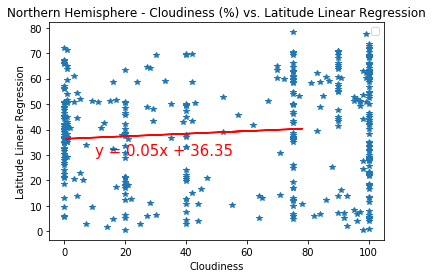

This plot shows relationship between cloudiness and latitude in the Northern Hemisphere. This looks like another one without a clear trend.


In [50]:
northerncloudiness = northerndf['Cloud Cover']
northernlat = northerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(northerncloudiness, northernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(northerncloudiness, northernlat, "*")
plt.plot(northernlat, intercept + slope*northernlat, "r")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("NcloudvsLLR.png")
plt.show()
print('This plot shows relationship between cloudiness and latitude in the Northern Hemisphere. This looks like another one without a clear trend.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope: -0.034726    intercept: -19.433907
R-squared: 0.009657


No handles with labels found to put in legend.


R-squared: 0.009657


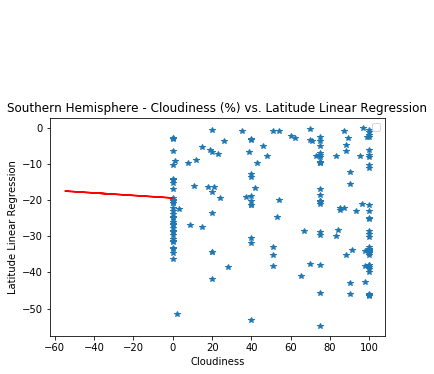

This plot shows relationship between cloudiness and latitude in the Southern Hemisphere. This looks like another one without a clear trend.


In [51]:
southerncloudiness = southerndf['Cloud Cover']
southernlat = southerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(southerncloudiness, southernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(southerncloudiness, southernlat, "*")
plt.plot(southernlat, intercept + slope*southernlat, "r")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("SCloudvsLLR.png")
plt.show()
print('This plot shows relationship between cloudiness and latitude in the Southern Hemisphere. This looks like another one without a clear trend.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

slope: -0.020666    intercept: 39.112230
R-squared: 0.000007


No handles with labels found to put in legend.


R-squared: 0.000007


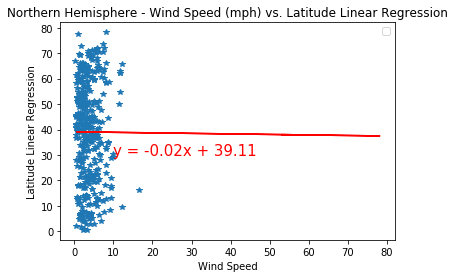

This plot shows relationship between wind speed and latitude in the Northern Hemisphere. Definitely seems to trend to be windier toward the equator.


In [52]:
northwindspeed = northerndf['Wind Speed']
northernlat = northerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(northwindspeed, northernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(northwindspeed, northernlat, "*")
plt.plot(northernlat, intercept + slope*northernlat, "r")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("NWindvsLLR.png")
plt.show()
print('This plot shows relationship between wind speed and latitude in the Northern Hemisphere. Definitely seems to trend to be windier toward the equator.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

No handles with labels found to put in legend.


slope: 0.642700    intercept: -23.425972
R-squared: 0.009299
R-squared: 0.009299


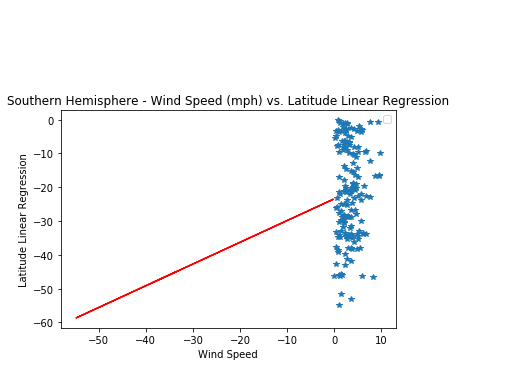

This plot shows relationship between wind speed and latitude in the Southern Hemisphere. Definitely seems to trend to be windier toward the equator.


In [53]:
southwindspeed = southerndf['Wind Speed']
southernlat = southerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(southwindspeed, southernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(southwindspeed, southernlat, "*")
plt.plot(southernlat, intercept + slope*southernlat, "r")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("SWindvsLLR.png")
plt.show()
print('This plot shows relationship between wind speed and latitude in the Southern Hemisphere. Definitely seems to trend to be windier toward the equator.')